## Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
## The above libraries are needed for performing the machine learning and evaluating the machine learning models.

## Loading the data.

In [2]:
df=pd.read_csv('train.csv')
## Reading the data using pd.read_csv as the dataset is in the csv format.

In [3]:
df
## Viewing the dataset.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
## The dataset has the following columns  User_ID, Product_ID, Gender, Age, Occupation, City_Category,
## Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and Purchase

## Data Understanding.

In [4]:
df.shape
## The dataframe has 550068 rows and 12 columns.

(550068, 12)

In [5]:
df.describe()
## The describe function shows us the descriptive statistics of our data and the shape of dataset distribution 

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()
## Using the info function we can see below that there are a few null values present in Product_Category_3 column
## And we can also see the types of variables present in these columns.            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum()
## The isnull().sum() function will help in finding all the null values present in the columns 
## There are 173638 missing values and 383247 missing values in the Product_category_2 and Product_category_3 columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Visualization

In [9]:
## The countplot shows the occurrences of the gender in the dataset.

<Axes: xlabel='Gender', ylabel='count'>

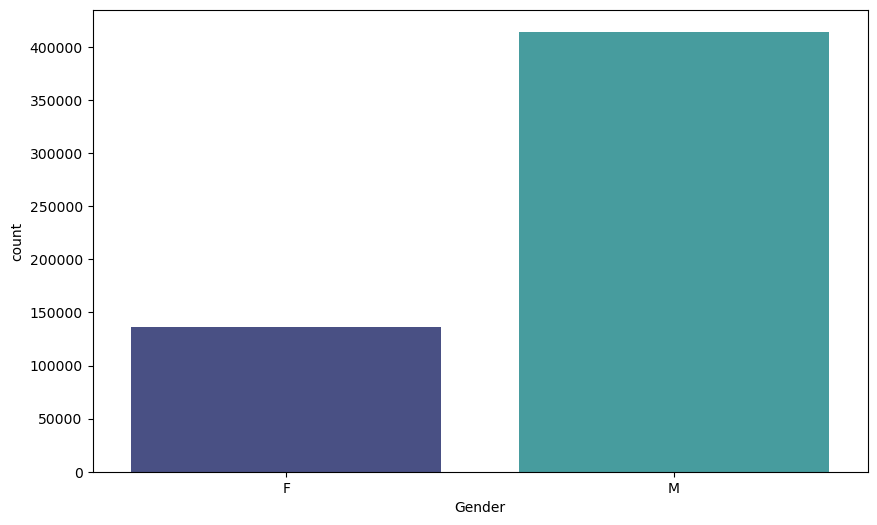

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='mako')
## The count of Male gender is higher as compared to the female.

<Axes: xlabel='Gender', ylabel='Marital_Status'>

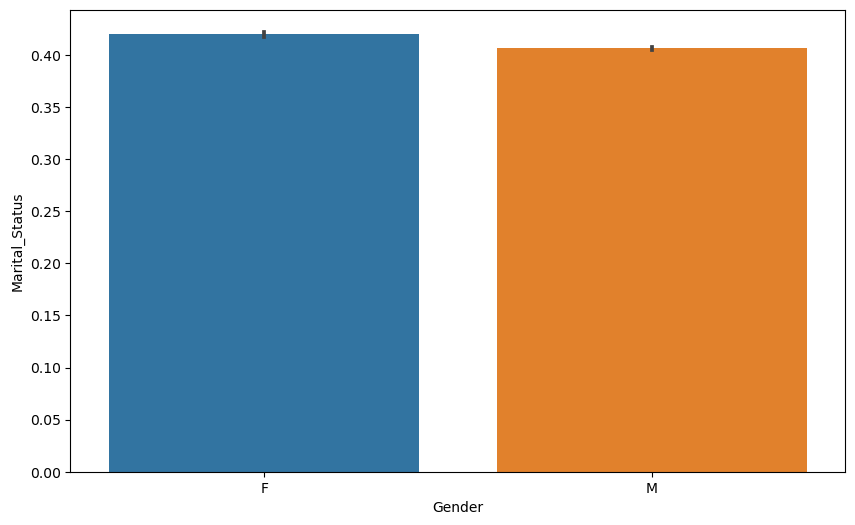

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Marital_Status',data=df)
## The below visualization shows us that the female gender is slightly higher compared to the male gender.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

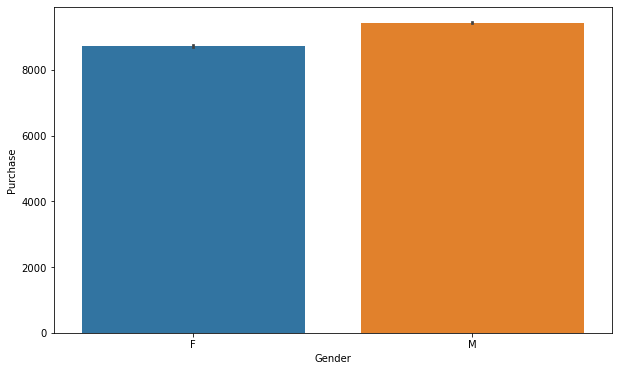

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Purchase',data=df)
## Higher purchases have been done by the male gender as compared to the female.

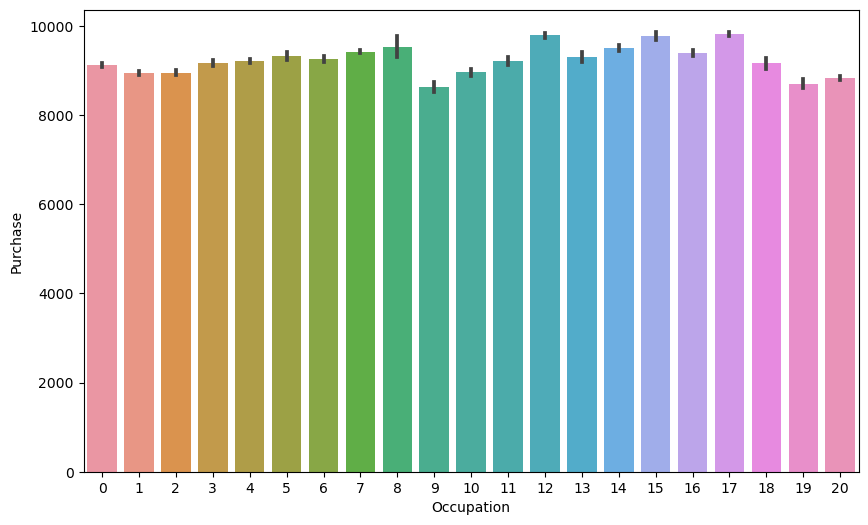

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',data=df);
## Occupation has a direct effect on the purchases done by the customer and the occupation codes 12,15,17 have higher purchases.

<Axes: xlabel='Occupation', ylabel='Purchase'>

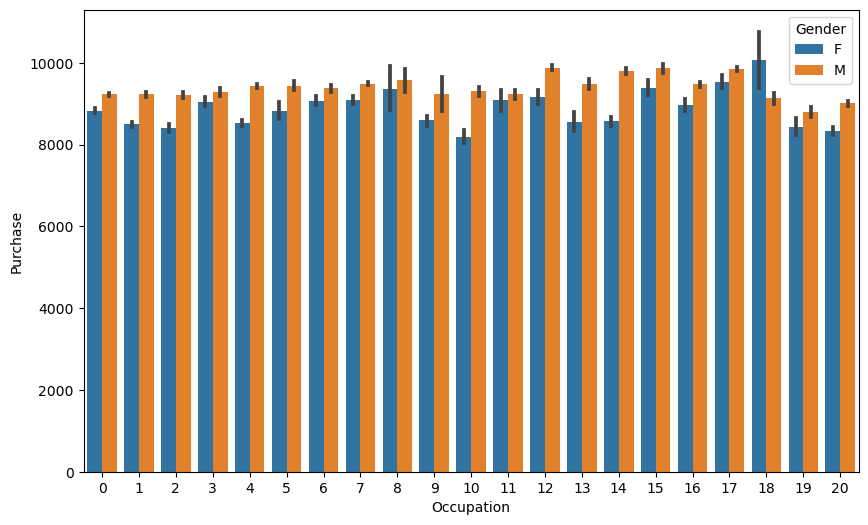

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
## In this graph it can be seen that the female gender in the occupation 18 with higher purchases compared to others.

# Outlier Detection.

## Checking the presence of outliers using BoxPlot.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

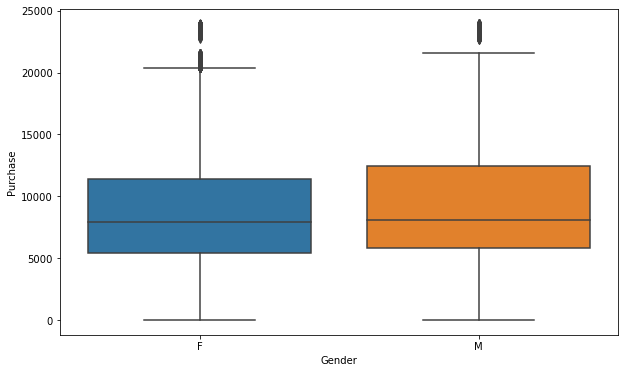

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Purchase")
## Using boxplot we can detect the presence of outliers in the data.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

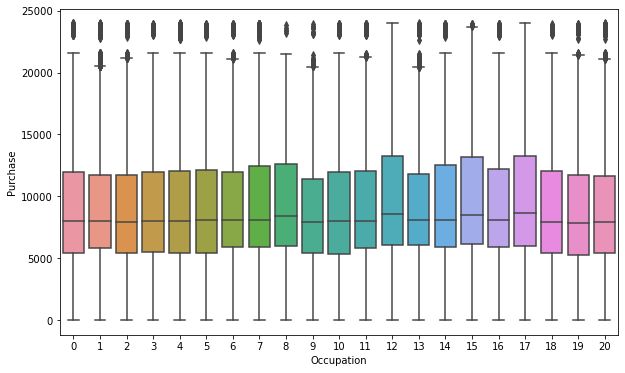

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Occupation", y="Purchase")
## The purchase column has outliers which may effect the performance of the machine learning models.

## As we can see above there are outliers present in the Purchase column.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

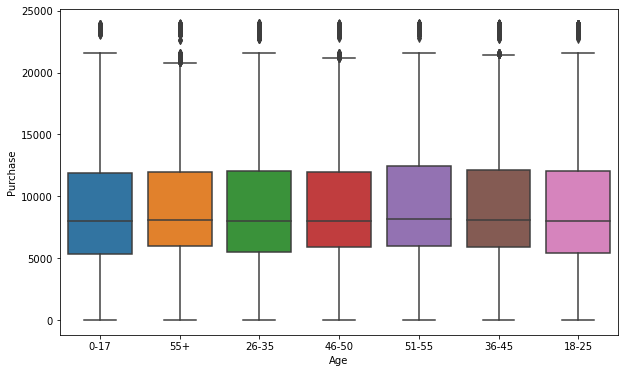

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="Purchase")
## We can see below that the Age with Purchases again have some outliers present in them.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

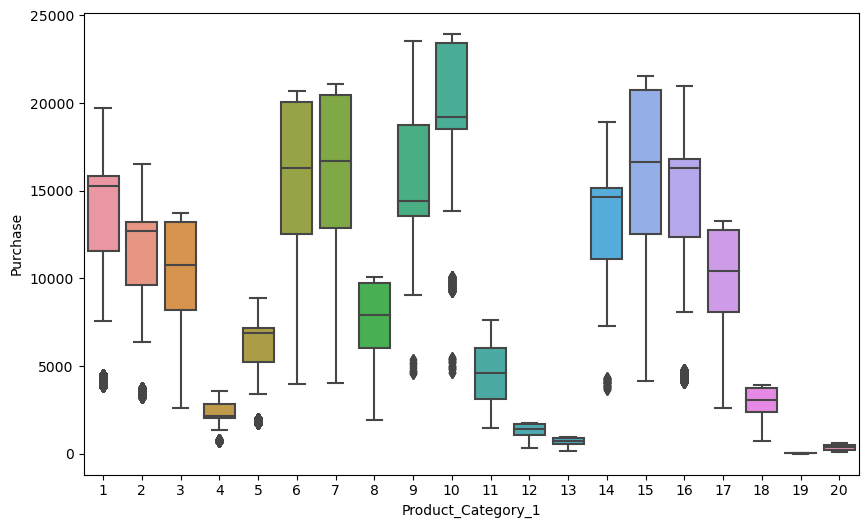

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product_Category_1", y="Purchase")
## There are outliers present in the Product category as well.

## Data preprocessing

In [19]:
## Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.

In [14]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [15]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))
## Replacing ''P00'' with no value and scaling the ProductID column. 

In [16]:
df.drop(['Product_Category_3'],axis=1,inplace=True)
## There are more than 50 percent missing values present in the Product_category_column so we will drop that column.

In [17]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
## The missing data in the product category 2 column have been imputed using mean.

In [18]:
df.isnull().sum()
## As we can see the missing values have been successfully imputed and now there are no null values present in the dataset.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


## Label Encoding is a technique used to turn categorical variables to numeric values.

In [20]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [24]:
df['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [25]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')
## Values in the Stay_In_Current_City_Years column has been changed from 4+ to 4

In [26]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
## The gender, Age and Stay_In_Current_City_Years values are changed to integer types. 

In [27]:
df['City_Category']=df['City_Category'].astype('category')
## The type of city_category has been changed from int to category.

In [28]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


# Distribution plot

### The distribution plot shows us how the overall data is distributed in the dataframe.

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

C:\Users\udaya\AppData\Local\Temp\ipykernel_3944\1595967053.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users\udaya\AppData\Local\Temp\ipykernel_3944\1595967053.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users\udaya\A

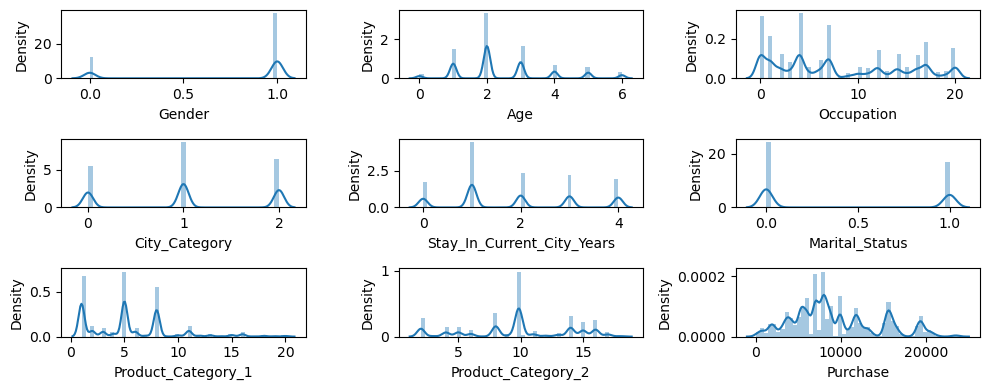

In [29]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
## The distribution plot helps us to detect the skewness of the data.Below as it can be seen that the purchase column 

In [30]:
df['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

# Log transformation

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In [31]:
df['Purchase']=np.log(df['Purchase'])
## The log transformation will help us transform the data and change the data to normal distribution

In [32]:
df= pd.get_dummies(df)
df.head()
## The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


# Train test split.

In [33]:
X=df.drop(labels=['Purchase'],axis=1)                         
Y=df['Purchase']
X.head()
## The data is split into X and Y where independent and dependent variables have been separated.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,False,False,True


In [34]:
# Target column.
Y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

## 80 percent data is used for training purpose and 20 percent is used for testing.

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
## The data has been split into Train and test.

(440054, 12) (110014, 12) (440054,) (110014,)


## Scaling the data

In [36]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)
## StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

# Machine Learning.

## Linear Regression

In [37]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
Y_predict=model.predict(X_test)
## Predicting on X_test

In [39]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.20164554932059042
mean_absolute_error:  0.45564101848200156
mean_squared_error:  0.44379455972337145
root_mean_squared_error:  0.6661790748165026


### The above evaluation metrics help us to find how well our model is performing. As we can see the r2_score is only 0.20 and as the Root mean square error is high the model is not very accurate to predict the purchases or the target column.

## Decision Tree Regressor

In [40]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [41]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [42]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.3680408214406253
RMSE TestData =  0.36894243727638626
--------------------------------------------------
RSquared value on train: 0.7519510621944241
RSquared value on test: 0.7551325821906107


### The Decision Tree Regressor is better compared to Linear regression as it can be observed that the root mean square error is less as compared to the previous model and the RSuared value is higher in this model.

## Random Forest Regressor

In [43]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [44]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [45]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.1314013217056682
RMSE TestData =  0.34937746980711964
--------------------------------------------------
RSquared value on train: 0.9683812383928421
RSquared value on test: 0.7804145462233611


### The Random Forest regressor model is again better than the previous model as we have a lower root mean square error value and the Rsquared value is higher than the previous model.

In [46]:
df_test=pd.read_csv('test.csv')
## Loading test dataset

In [47]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [48]:
df_test.isnull().sum()
## Checking for missing values present in the test dataset.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## The null values in the test data have to be treated as well.

In [49]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))
## The 'P00' value has been replaced int he ProductId column and the column has been scaled. 

In [50]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)
## As the Product_Category_3 column in the train set had been removed. Same has been done here aswell.

In [51]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())
## Product_Category_2 has been imputed with mean

In [52]:
df_test.isnull().sum()
## As we see there are no null values in the test dataframe as well.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [53]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


## Label Encoding categorical data

In [54]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

## Categorical data in the test dataframe are converted to numeric values using label encoding.

In [55]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')
## The 4+ value in the Stay_In_Current_City_Years have been replaced with only 4.

In [56]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')
## The values in the test set have been converted to integer types as done in the train set.

In [57]:
df_test= pd.get_dummies(df_test)
## Dummies are created for the test set.

In [58]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


### Shape of the train data.

In [59]:
df.shape
# train data shape

(550068, 13)

### Shape of the test data.

In [60]:
df_test.shape
# test data shape

(233599, 12)

In [61]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,False,True,False
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,False,False,True
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,False,True,False
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,False,False,True


In [62]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.000000,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,False,True,False
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,False,True,False
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,False,True,False
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,False,False,True


In [63]:
test_preds= RF.predict(df_test)
len(test_preds)

C:\Users\udaya\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


233599

## As random forest regressor performed very well compared to linear regression and decision tree regressor model. Random forest regressor model has been used to predict on our test dataset.

In [64]:
id_frame=pd.read_csv('test.csv')

In [65]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()
## Using User_Id and Product_Id from the test set.

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [66]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()
## Predictions have been save in the form of a dataframe

,Purchase,User_ID,Product_ID
0,9.589620,1000004,P00128942
1,9.579835,1000009,P00113442
2,4.533752,1000010,P00288442
3,4.533752,1000010,P00145342
4,4.498170,1000011,P00053842


In [67]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)
## Finally converted the prediction into csv format.